# Importações

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Captura das fotos

In [53]:
count = 0

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Não foi possível abrir a câmera.")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Frame não capturado.")
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame', gray_frame)

    if cv2.waitKey(1) == ord('s'):
        count += 1
        
        cv2.imwrite(f"images/img_{count:d}.png", gray_frame)
        cv2.waitKey(1000)
        
    if cv2.waitKey(1) == ord('q'):
        break

# Carrega as imagens capturadas

In [54]:
imgs = [cv2.imread(f'images/img_{i}.png', cv2.IMREAD_GRAYSCALE).astype(np.float32) for i in range(1, 11)]

# Visualização das imagens capturadas

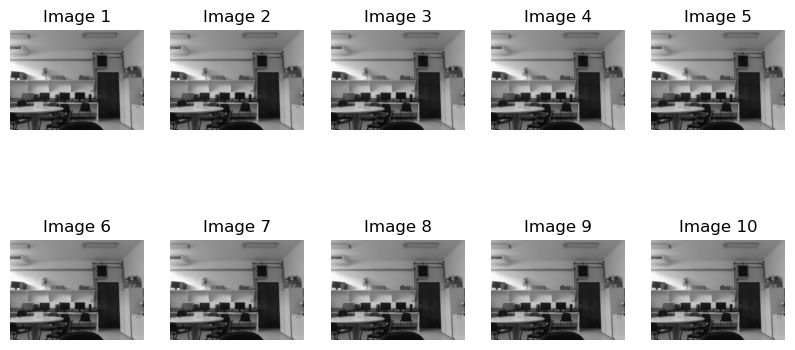

In [55]:
fig = plt.figure(figsize=(10, 5))

for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(imgs[0], cmap='gray')
    plt.axis('off')
    plt.title(f"Image {i}")

plt.show()    

# Calculando a diferença acumulada entre as imagens

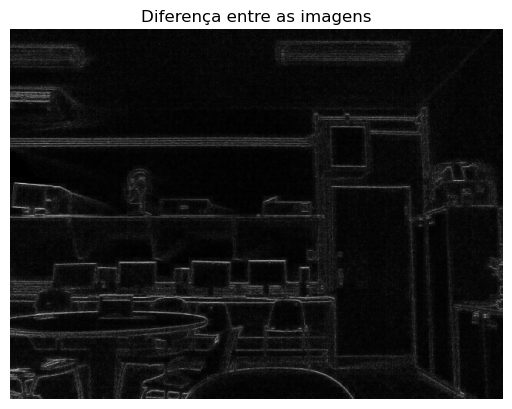

In [56]:
diff = 0

for i in range(0, 9):
    img_a = imgs[i]
    img_b = imgs[i+1]

    diff += cv2.absdiff(img_a, img_b)

cv2.imwrite('images/diff.png', diff)

plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.title('Diferença entre as imagens');

# Calculando a média e o desvio padrão entre as imagens

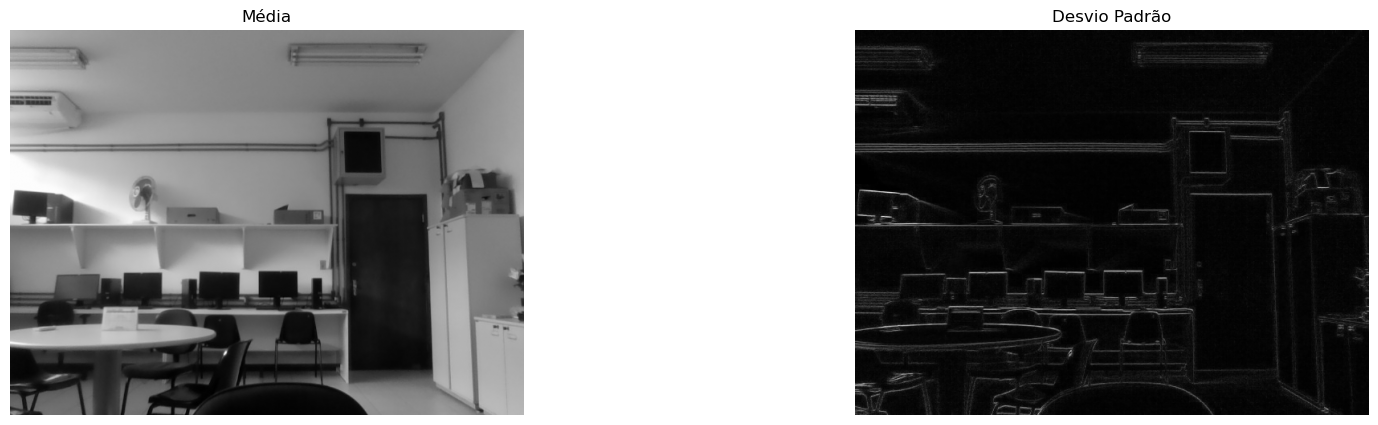

: 

In [ ]:
imgs_stack = np.stack(imgs, axis=0)

# Calcula a média e o desvio padrão
mean_img = np.mean(imgs_stack, axis=0)

cv2.imwrite('images/mean.png', mean_img)

std_img = np.std(imgs_stack, axis=0)

cv2.imwrite('images/std.png', std_img)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.imshow(mean_img, cmap='gray')
plt.axis('off')
plt.title('Média');


plt.subplot(1, 2, 2)
plt.imshow(std_img, cmap='gray')
plt.axis('off')
plt.title('Desvio Padrão');